In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
Vi=5
Vg=28
Step=4
EnergyC = np.arange(Vi, Vg+7, 1)
Material="Rh"
nameCurrent="75" #28
#nameCurrent="20" #38
#nameCurrent="10" #48
MaterialRAW="RAWII9.2"+Material
MaterialFF="FF9.2"+Material
name2="ImE"
name5="DataExperimental"
name6="Frequency.txt"
name0FF=name5+"/"+MaterialFF+str(Vg)+"_"+nameCurrent
name1FF="FF9.2"+"_"+Material+str(Vg)+"_"+nameCurrent+"Data"
name0RAW=name5+"/"+MaterialRAW+str(Vg)+"_"+nameCurrent
name1RAW="RAWII9.2"+"_"+Material+str(Vg)+"_"+nameCurrent+"Data"
#NFrames=16 #Al28
#NFrames=33 #Al38
#NFrames=34 #Al48
NFrames=21 #Rh28

In [3]:
BinT = []
for i in range(Vi, Vg, Step):
    Bin = np.arange(i, min(i+Step, Vg+1), 1)
    BinT.append(Bin)

In [4]:
def Im(name0,name1,name2,BinT,NFrames):
    H=[]
    for j in range(len(BinT)):
        I=[]
        for i in range(1,NFrames+1):
            Es=np.genfromtxt(name0+"/"+name1+"{}".format(i)+"/"+name2+"_"+str(np.min(BinT[j]))+"-"+str(np.max(BinT[j]))+".txt")
            I.append(Es)
        H.append(sum(I))
    return H

In [5]:
def Frequency(name0,name1,name2,NFrames):
    I=[]
    for i in range(1,NFrames+1):
        Es=np.genfromtxt(name0+"/"+name1+"{}".format(i)+"/"+name2)
        I.append(Es)
    return I

In [6]:
def FFC(IM, FF, u):
    FFC=np.rot90(IM/FF,u)
    maxIM = 0
    for i in range(len(IM)):
        for j in range(len(IM)):
            if (FFC[i,j] > maxIM and  not np.isinf(FFC[i,j])):
                maxIM = FFC[i,j]
            if (np.isnan( FFC[i,j] ) or np.isinf(-FFC[i,j])):
                FFC[i,j] = 0
    return FFC

In [7]:
def Raws(name, radius):
    G=radius // 2
    RAW=np.copy(name)
    for i in range(len(RAW)):
        for j in range(len(RAW)):
            if RAW[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-G, a+G+1):
                    for n in range(b-G, b+G+1):   
                        try:
                            suma += RAW[k,n]
                            if RAW[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    RAW[i,j] = suma/(9-c)
                else:
                    RAW[i,j] = suma/(6-c)
    return RAW

In [8]:
RAWE=Im(name0RAW,name1RAW,name2,BinT,NFrames)
FFE=Im(name0FF,name1FF,name2,BinT,NFrames)
I=Frequency(name0FF,name1FF,name6,NFrames)

In [9]:
u=1
RAWES=[]
for i in range(len(BinT)):
    RAWES.append(Raws(FFC(RAWE[i], FFE[i], u), 3))

C:\Users\USER\AppData\Local\Temp\ipykernel_6684\3278609898.py:2: RuntimeWarning: divide by zero encountered in divide
  FFC=np.rot90(IM/FF,u)
C:\Users\USER\AppData\Local\Temp\ipykernel_6684\3278609898.py:2: RuntimeWarning: invalid value encountered in divide
  FFC=np.rot90(IM/FF,u)


In [10]:
BinT

[array([5, 6, 7, 8]),
 array([ 9, 10, 11, 12]),
 array([13, 14, 15, 16]),
 array([17, 18, 19, 20]),
 array([21, 22, 23, 24]),
 array([25, 26, 27, 28])]

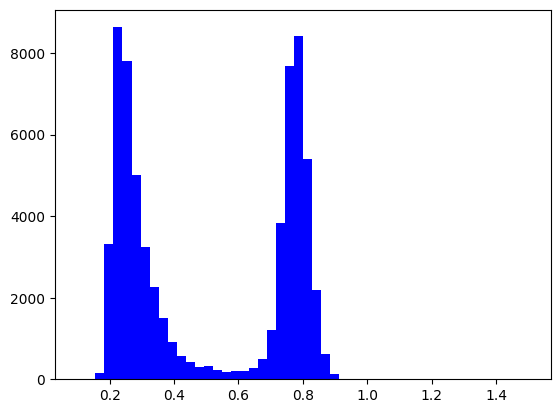

In [11]:
kk=3
ImRAW=RAWES[kk]
ImGG=plt.hist(np.ravel(ImRAW),bins=50,color="blue",range=(0.1,1.5))

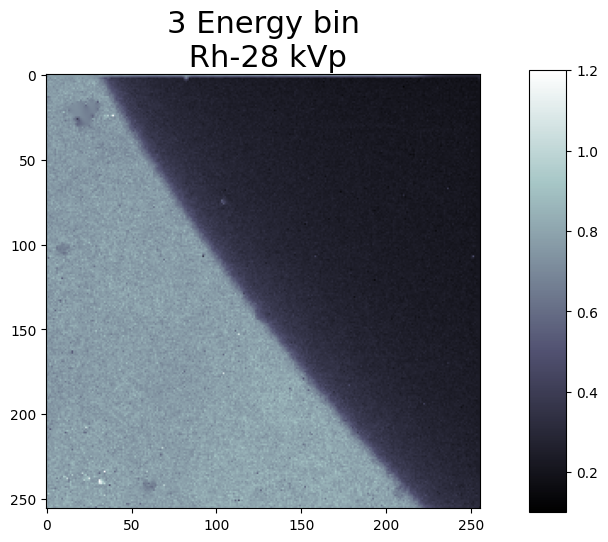

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(ImRAW, cmap="bone",vmin=0.1,vmax=1.2)
plt.title(str(kk)+" Energy bin\n "+Material+"-"+str(Vg)+" kVp", fontsize=22)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

In [13]:
EnergyB=[]
DistriB=[]
for j in range(NFrames):
    Energy=[]
    Distri=[]
    for i in range(len(I[j])):
        Energy.append(I[j][i][0])
        Distri.append(I[j][i][1])
    EnergyB.append(Energy)
    DistriB.append(Distri)

In [14]:
Freq=[]
for i in range(NFrames):
    Freq.append(np.interp(EnergyC, EnergyB[i], DistriB[i]))
FreqT=sum(Freq)

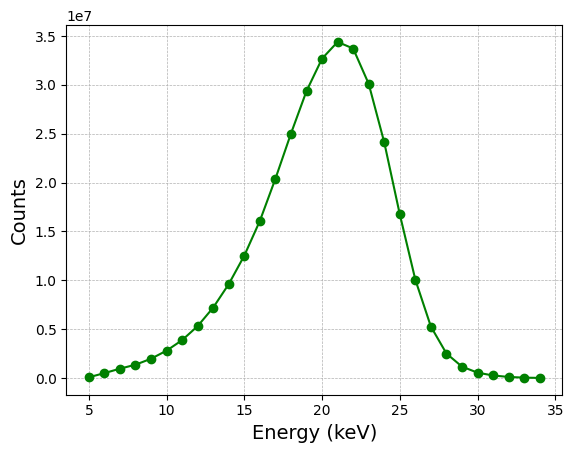

In [15]:
plt.plot(EnergyC,FreqT, '-o', color="green")
plt.xlabel("Energy (keV)",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)